Loaded compra_passagens from ../data\compra_passagens.csv
Loaded venda_milhas from ../data\venda_milhas.csv

Summary of table: compra_passagens


,cliente_id,data_compra,milhas_usadas,valor_passagem
0,328,2022-01-03,5229,184.81
1,563,2022-08-20,120,1858.77
2,565,2022-12-07,3748,263.03
3,134,2022-07-20,2533,651.99
4,540,2022-12-22,9336,1586.02



Descriptive statistics:


,cliente_id,milhas_usadas,valor_passagem
count,1000.000000,1000.000000,1000.00000
mean,498.008000,5022.948000,1046.96967
std,281.722895,2836.887147,560.40256
min,2.000000,113.000000,101.80000
25%,255.000000,2625.000000,549.25750
50%,501.000000,4939.500000,1027.64000
75%,736.000000,7481.500000,1555.11000
max,999.000000,9996.000000,1996.93000



Missing values:


cliente_id        0
data_compra       0
milhas_usadas     0
valor_passagem    0
dtype: int64


Distribution of numerical columns:


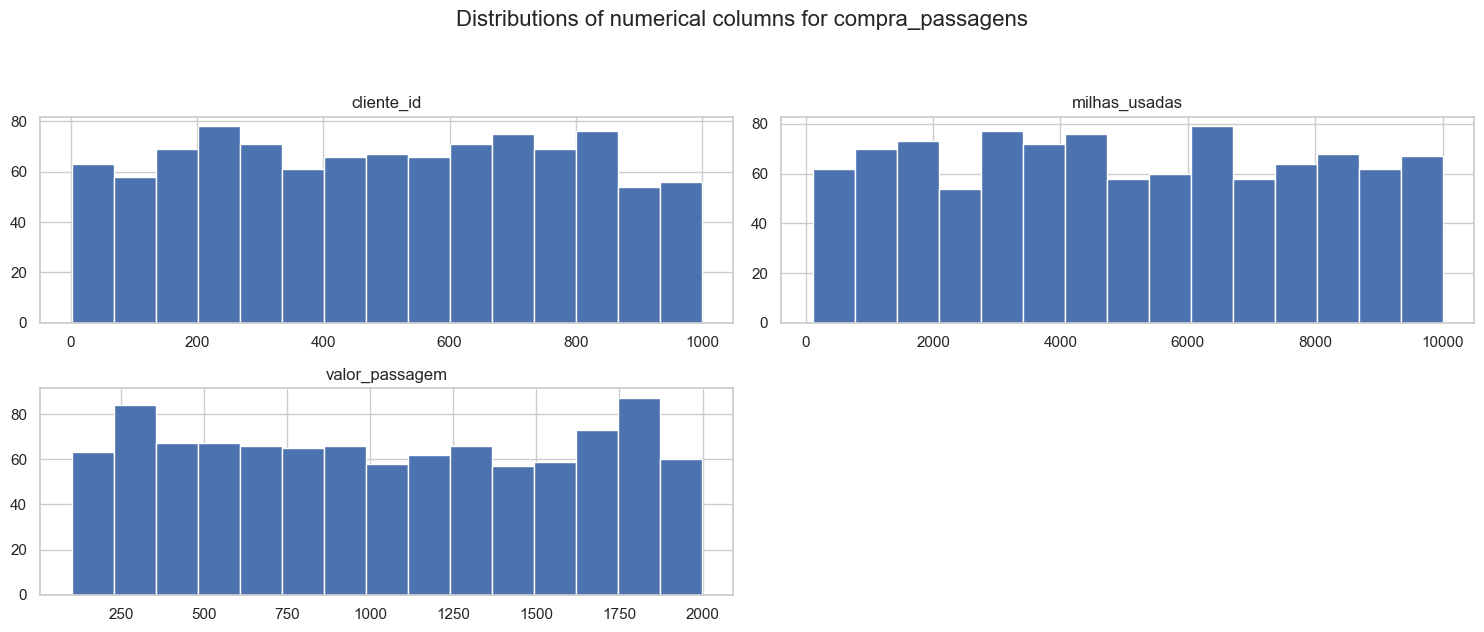


Boxplots for numerical columns (to detect outliers):


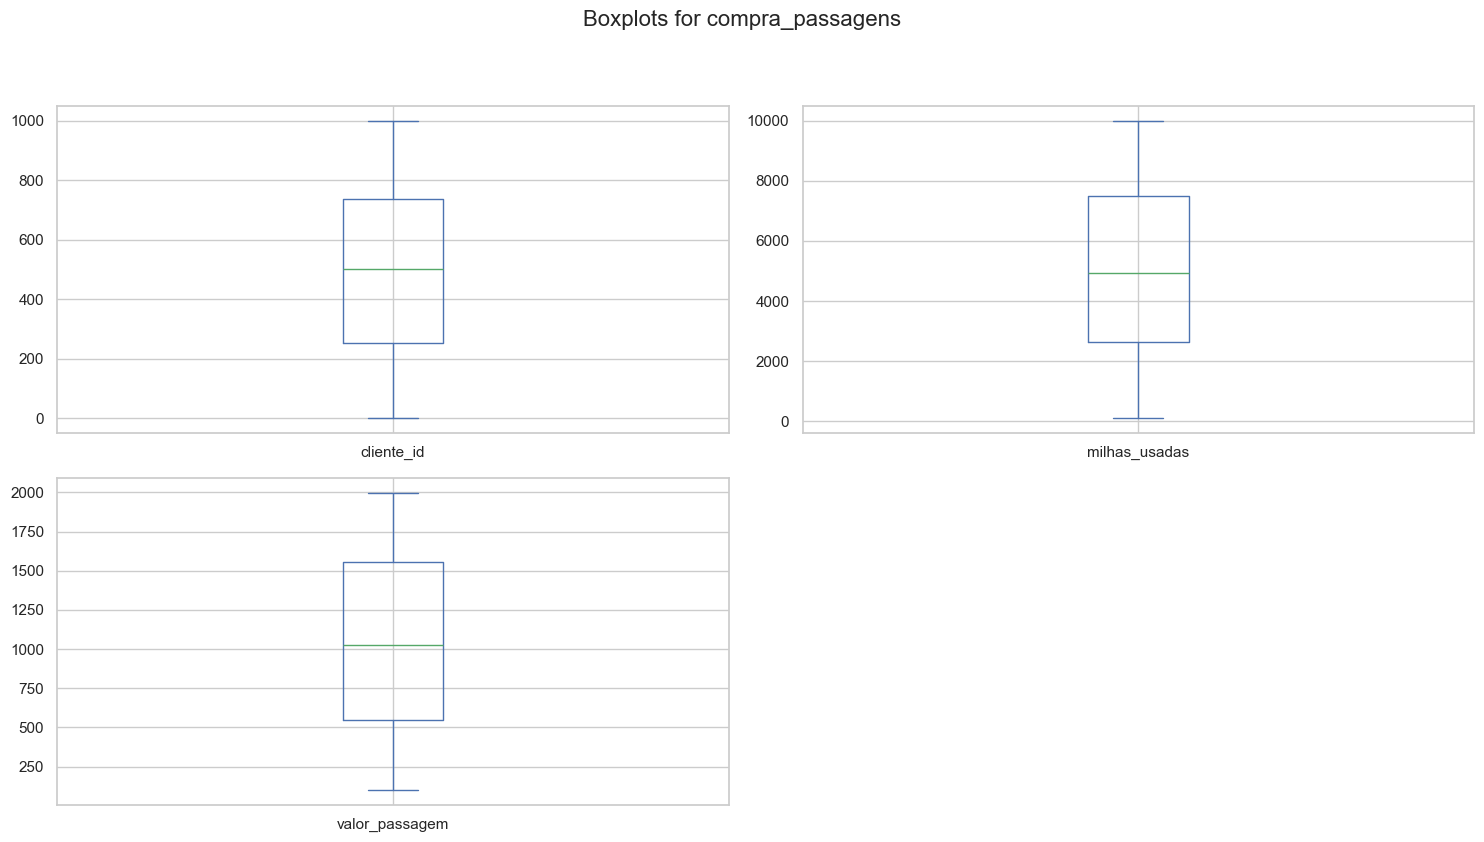


Summary of table: venda_milhas


,cliente_id,data_venda,milhas_vendidas,valor_venda
0,647,2023-05-10,2008,1573.47
1,658,2022-06-26,1549,970.98
2,203,2022-11-06,5468,926.35
3,521,2023-09-23,9710,775.37
4,792,2022-06-22,1775,1387.26



Descriptive statistics:


,cliente_id,milhas_vendidas,valor_venda
count,1000.000000,1000.000000,1000.000000
mean,487.648000,4997.282000,1038.014330
std,290.868666,2836.559013,537.075754
min,1.000000,106.000000,100.030000
25%,231.750000,2497.000000,573.565000
50%,488.500000,5053.500000,1018.200000
75%,731.250000,7289.250000,1493.555000
max,1000.000000,9998.000000,1999.660000



Missing values:


cliente_id         0
data_venda         0
milhas_vendidas    0
valor_venda        0
dtype: int64


Distribution of numerical columns:


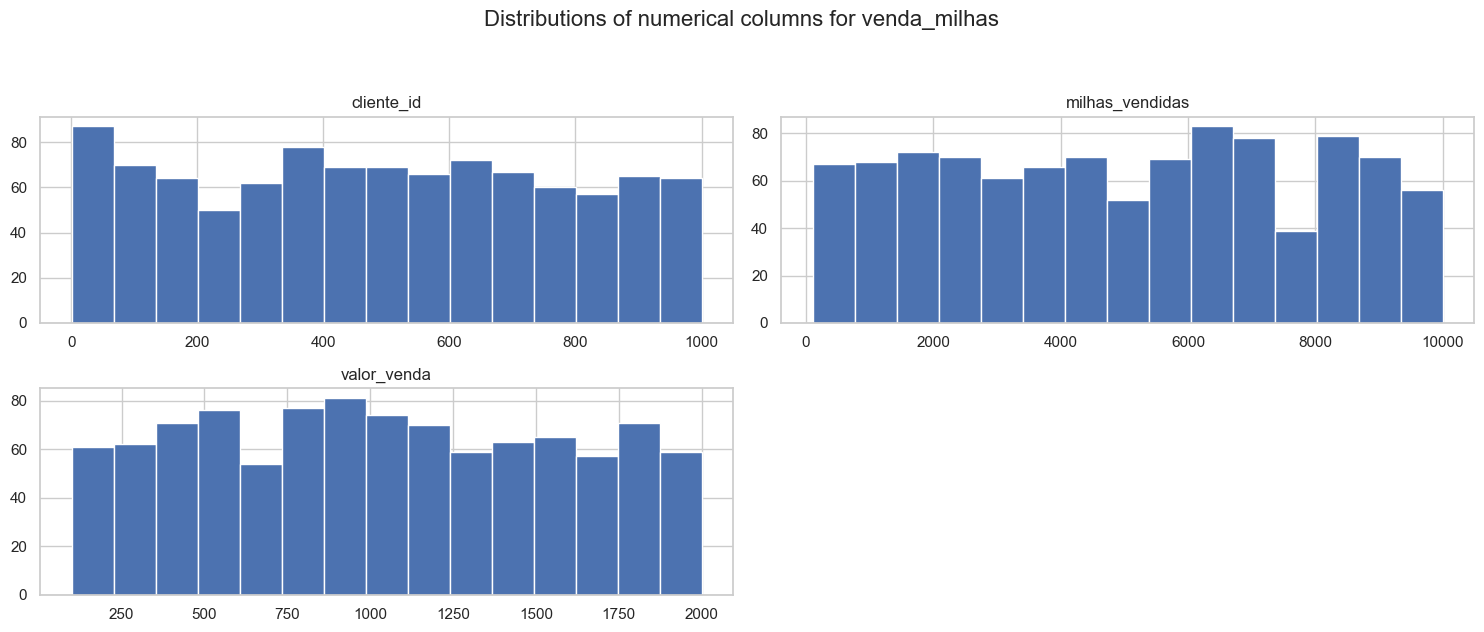


Boxplots for numerical columns (to detect outliers):


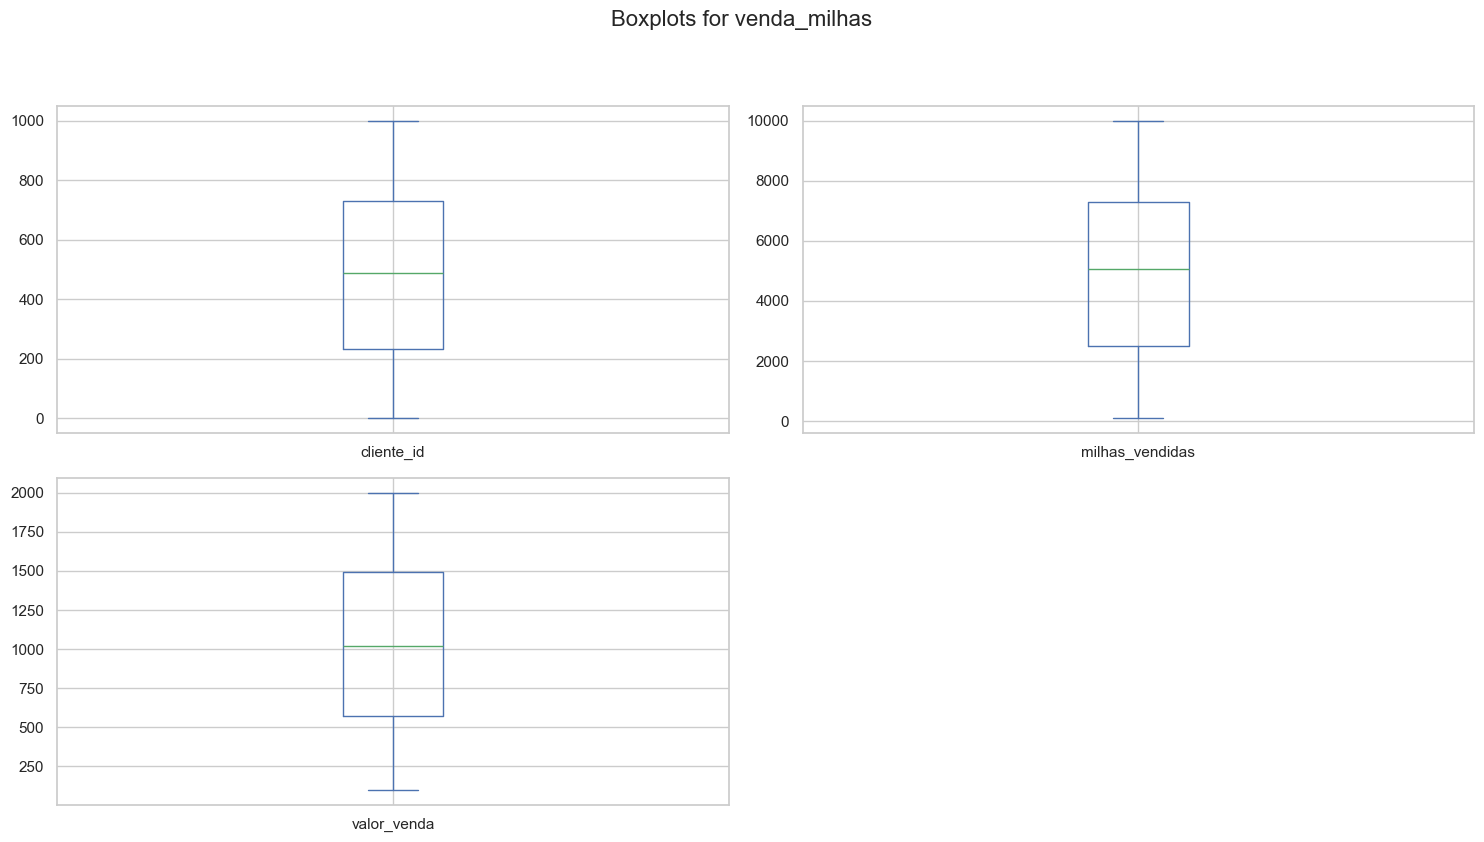


Correlation Matrix for compra_passagens:


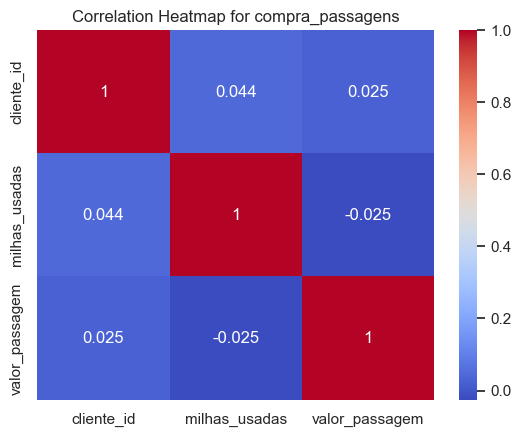


Correlation Matrix for venda_milhas:


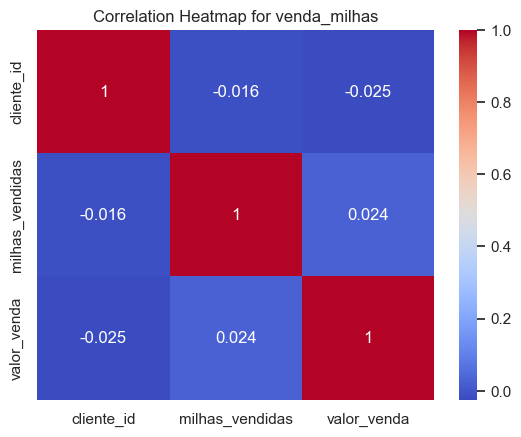


Data Quality Report for compra_passagens:
Missing Values:


np.int64(0)

Duplicate Rows:


np.int64(0)

Unique Values per Column:


cliente_id        634
data_compra       537
milhas_usadas     952
valor_passagem    996
dtype: int64

Zero or Negative Values:


cliente_id        0
milhas_usadas     0
valor_passagem    0
dtype: int64


Data Quality Report for venda_milhas:
Missing Values:


np.int64(0)

Duplicate Rows:


np.int64(0)

Unique Values per Column:


cliente_id         616
data_venda         551
milhas_vendidas    958
valor_venda        995
dtype: int64

Zero or Negative Values:


cliente_id         0
milhas_vendidas    0
valor_venda        0
dtype: int64

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Function to load data from a CSV file
def load_data(csv_file):
    return pd.read_csv(csv_file)

# Directory where CSV files are saved
data_dir = '../data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Load all CSV files into a dictionary of DataFrames
dataframes = {}
for csv_file in csv_files:
    table_name = os.path.splitext(csv_file)[0]
    file_path = os.path.join(data_dir, csv_file)
    dataframes[table_name] = load_data(file_path)
    print(f"Loaded {table_name} from {file_path}")

# Explore the DataFrames
for table_name, df in dataframes.items():
    print(f"\nSummary of table: {table_name}")
    display(df.head())
    
    # Basic descriptive statistics
    print("\nDescriptive statistics:")
    display(df.describe())
    
    # Check for missing values
    print("\nMissing values:")
    display(df.isnull().sum())

    # Visualize distributions of numerical columns
    print("\nDistribution of numerical columns:")
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols_len = len(num_cols)
    num_cols_layout = (2, num_cols_len // 2 + num_cols_len % 2)
    df[num_cols].hist(bins=15, figsize=(15, 6), layout=num_cols_layout)
    plt.suptitle(f"Distributions of numerical columns for {table_name}", y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Check for outliers using boxplots
    print("\nBoxplots for numerical columns (to detect outliers):")
    df[num_cols].plot(kind='box', subplots=True, layout=num_cols_layout, figsize=(15, 8), sharex=False, sharey=False)
    plt.suptitle(f"Boxplots for {table_name}", y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

# Check correlation between numerical variables in each DataFrame
for table_name, df in dataframes.items():
    print(f"\nCorrelation Matrix for {table_name}:")
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 1:
        corr = df[num_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title(f"Correlation Heatmap for {table_name}")
        plt.show()

# Function to check quality of the data
def check_data_quality(df):
    quality_report = {}

    # Check for missing values
    missing_values = df.isnull().sum().sum()
    quality_report["Missing Values"] = missing_values

    # Check for duplicates
    duplicates = df.duplicated().sum()
    quality_report["Duplicate Rows"] = duplicates

    # Count unique values per column
    unique_vals = df.nunique()
    quality_report["Unique Values per Column"] = unique_vals

    # Check for zero or negative values in numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    zero_neg_vals = (df[num_cols] <= 0).sum()
    quality_report["Zero or Negative Values"] = zero_neg_vals

    return quality_report

# Quality checks for each table
for table_name, df in dataframes.items():
    print(f"\nData Quality Report for {table_name}:")
    quality_report = check_data_quality(df)
    for key, value in quality_report.items():
        print(f"{key}:")
        display(value)

